In [1]:
#import the Parser, different classifiers implemented for TP2

from Classifier import ConLLUParser
from differentClassifiers import NaiveClassifier, RandomClassifier, StratifiedClassifier, MostCommonPOSClassifier, WordDistributedRandomClassifier

             sent_id                                               text  \
0  fr-ud-train_00001  Les commotions cérébrales sont devenu si coura...   
1  fr-ud-train_00002  L'œuvre est située dans la galerie des bataill...   
2  fr-ud-train_00003  Le comportement de la Turquie vis-à-vis du pro...   
3  fr-ud-train_00004        Toutefois, les filles adorent les desserts.   
4  fr-ud-train_00005  Ismene entre et annonce que c'est Farnace qui ...   

   length  
0      19  
1      17  
2      34  
3       8  
4      18  


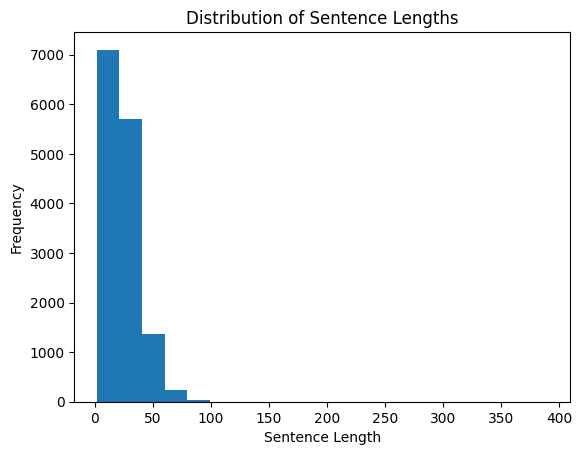

In [2]:
import matplotlib.pyplot as plt
verbose = False
fr_train = ConLLUParser('fr_gsd-ud-train.conllu', verbose)
fr_dev = ConLLUParser('fr_gsd-ud-dev.conllu', verbose)
fr_test = ConLLUParser('fr_gsd-ud-test.conllu', verbose)

print(fr_train.sentences.head())
plt.hist(fr_train.sentences['length'], bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()

In [4]:
train_contradictions=fr_train.contradictions
train_sentences=fr_train.sentences
train_words=fr_train.words

In [5]:
train_sentences

,sent_id,text,length
0,fr-ud-train_00001,Les commotions cérébrales sont devenu si coura...,19
1,fr-ud-train_00002,L'œuvre est située dans la galerie des bataill...,17
2,fr-ud-train_00003,Le comportement de la Turquie vis-à-vis du pro...,34
3,fr-ud-train_00004,"Toutefois, les filles adorent les desserts.",8
4,fr-ud-train_00005,Ismene entre et annonce que c'est Farnace qui ...,18
...,...,...,...
14445,fr-ud-train_14550,"Le 28 mars 1792, ces territoires formèrent deu...",22
14446,fr-ud-train_14551,Ce débutant de l'année 1983 et double All-Star...,58
14447,fr-ud-train_14552,La population est alors indigène et fait parti...,25
14448,fr-ud-train_14553,"Mais MSI propose aussi, pour 699 euros, une ve...",25


In [6]:
fr_train.words

,sent_id,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC
0,fr-ud-train_00001,1,Les,le,DET,_,Definite=Def|Number=Plur|PronType=Art,2,det,_,wordform=les
1,fr-ud-train_00001,2,commotions,commotion,NOUN,_,Gender=Fem|Number=Plur,5,nsubj,_,_
2,fr-ud-train_00001,3,cérébrales,cérébral,ADJ,_,Gender=Fem|Number=Plur,2,amod,_,_
3,fr-ud-train_00001,4,sont,être,AUX,_,Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbF...,5,aux:tense,_,_
4,fr-ud-train_00001,5,devenu,devenir,VERB,_,Gender=Masc|Number=Sing|Tense=Past|Typo=Yes|Ve...,0,root,_,CorrectForm=devenues|CorrectGender=Fem|Correct...
...,...,...,...,...,...,...,...,...,...,...,...
354562,fr-ud-train_14554,39,d',de,ADP,_,_,40,case,_,SpaceAfter=No
354563,fr-ud-train_14554,40,en,en,ADP,_,_,38,advmod,_,ExtPos=ADV|Idiom=Yes
354564,fr-ud-train_14554,41,haut,haut,NOUN,_,Gender=Masc|Number=Sing,40,fixed,_,InIdiom=Yes
354565,fr-ud-train_14554,42,»,»,PUNCT,_,_,34,punct,_,SpaceAfter=No


In [7]:
words_interest=train_words[['FORM','UPOS']]
words_interest.groupby('UPOS')
words_interest['UPOS'].value_counts(normalize=False)


UPOS
NOUN     66421
ADP      56473
DET      54144
PUNCT    39011
VERB     28185
PROPN    24750
ADJ      20981
PRON     16050
ADV      12443
AUX      11587
CCONJ     9301
NUM       9255
X         2680
SCONJ     2598
SYM        619
INTJ        69
Name: count, dtype: int64

In [20]:
train_words= fr_train.words
test_data=fr_test.words
data = train_words

word_distributed_classifier = WordDistributedRandomClassifier()
word_distributed_classifier.fit(train_words)  
# Training and evaluating
word_distributed_classifier = WordDistributedRandomClassifier()
word_distributed_classifier.fit(train_words)  

predictions = word_distributed_classifier.predict(test_data)  

accuracy = word_distributed_classifier.evaluate(test_data)
print(accuracy)

0.8880678981527709


In [19]:
word_distributed_classifier.evaluate(test_data)

0.8867698452321517

In [10]:
train_words= fr_train.words
test_data=fr_test.words
data = train_words
stratifiedClassifier = StratifiedClassifier()
stratified_accuracy = stratifiedClassifier.evaluate(data)
print(f"Accuracy of StratifiedClassifier: {stratified_accuracy}")

Accuracy of StratifiedClassifier: {'accuracy': 0.11679033863839557}


In [157]:
stratified_predictions

array(['AUX', 'NOUN', 'PROPN', ..., 'DET', 'DET', 'NOUN'], dtype='<U5')

In [107]:
occurence_of_words=data['FORM'].value_counts()
occurence_of_words.to_csv('occurence_of_words.csv')

In [28]:
train_words= fr_train.words
test_data=fr_test.words
data = train_words
train_data=train_words
import pandas as pd
#Q1: ____________________________
naive_classifier = NaiveClassifier()
random_classifier = RandomClassifier()

naive_predictions = naive_classifier.predict(data)

naive_accuracy = naive_classifier.evaluate(data['UPOS'].tolist(), naive_predictions)
print(f"Accuracy of NaiveClassifier: {naive_accuracy}")

#Q2: For 10 differentt seeds, computing accuracy per each case : 
for seed in range(10):
    random_classifier = RandomClassifier(random_seed=seed)
    random_predictions = random_classifier.predict(data)
    random_accuracy = random_classifier.evaluate(data['UPOS'].tolist(), random_predictions)
    print(f"Accuracy of RandomClassifier with seed {seed}: {random_accuracy}")
    
# Q3: For POS distribution : 
stratifiedClassifier = StratifiedClassifier()
stratified_accuracy = stratifiedClassifier.evaluate(data)
print(f"Accuracy of StratifiedClassifier: {stratified_accuracy}")

# Q4: For mostCommon POS: 
mostCommonPOSClassifier = MostCommonPOSClassifier()
mostCommonPOSClassifier_accuracy = mostCommonPOSClassifier.evaluate(data)
print(f"Accuracy of MostCommonClassifier: {mostCommonPOSClassifier_accuracy}")

# Q5: 
word_distributed_classifier = WordDistributedRandomClassifier()
word_distributed_classifier.fit(train_data)  
predictions = word_distributed_classifier.predict(test_data) 

accuracy =  word_distributed_classifier.evaluate(test_data)
print(accuracy)

Accuracy of NaiveClassifier: 0.6216004309481706
Accuracy of RandomClassifier with seed 0: 0.06279490195083016
Accuracy of RandomClassifier with seed 1: 0.06276669853652483
Accuracy of RandomClassifier with seed 2: 0.06123807348117563
Accuracy of RandomClassifier with seed 3: 0.062453640637735605
Accuracy of RandomClassifier with seed 4: 0.06364382472142077
Accuracy of RandomClassifier with seed 5: 0.062287240493334124
Accuracy of RandomClassifier with seed 6: 0.06234082698051426
Accuracy of RandomClassifier with seed 7: 0.06260311873355388
Accuracy of RandomClassifier with seed 8: 0.06235492868766693
Accuracy of RandomClassifier with seed 9: 0.061759836645824344
Accuracy of StratifiedClassifier: {'accuracy': 0.11624319240087205}
Accuracy of MostCommonClassifier: {'accuracy': 0.18732989815747095}
0.8879680479281078


## Question 4 : by frequency of each POS

 answer has been detailed above

In [140]:
c=data.UPOS.value_counts(normalize=True)
c

NOUN     0.187330
ADP      0.159273
DET      0.152705
PUNCT    0.110024
VERB     0.079491
PROPN    0.069803
ADJ      0.059174
PRON     0.045266
ADV      0.035094
AUX      0.032679
CCONJ    0.026232
NUM      0.026102
X        0.007559
SCONJ    0.007327
SYM      0.001746
INTJ     0.000195
Name: UPOS, dtype: float64

## Question 5:  random for each POS that doesn't belong to training data words 

In [184]:
data

,sent_id,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC
0,fr-ud-train_00001,1,Les,le,DET,_,Definite=Def|Number=Plur|PronType=Art,2,det,_,wordform=les
1,fr-ud-train_00001,2,commotions,commotion,NOUN,_,Gender=Fem|Number=Plur,5,nsubj,_,_
2,fr-ud-train_00001,3,cérébrales,cérébral,ADJ,_,Gender=Fem|Number=Plur,2,amod,_,_
3,fr-ud-train_00001,4,sont,être,AUX,_,Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbF...,5,aux:tense,_,_
4,fr-ud-train_00001,5,devenu,devenir,VERB,_,Gender=Masc|Number=Sing|Tense=Past|Typo=Yes|Ve...,0,root,_,CorrectForm=devenues|CorrectGender=Fem|Correct...
...,...,...,...,...,...,...,...,...,...,...,...
354562,fr-ud-train_14554,39,d',de,ADP,_,_,40,case,_,SpaceAfter=No
354563,fr-ud-train_14554,40,en,en,ADP,_,_,38,advmod,_,ExtPos=ADV|Idiom=Yes
354564,fr-ud-train_14554,41,haut,haut,NOUN,_,Gender=Masc|Number=Sing,40,fixed,_,InIdiom=Yes
354565,fr-ud-train_14554,42,»,»,PUNCT,_,_,34,punct,_,SpaceAfter=No


In [195]:
word_frequencies = data['FORM'].value_counts()

distribution = data.groupby('FORM')['UPOS'].value_counts(normalize=True).unstack().fillna(0)

df=distribution.reindex(word_frequencies.index)
df

UPOS,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X
de,0.0,0.984778,0.000042,0.00000,0.0,0.014002,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.001177
",",0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.00000,0.000000
.,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.00000,0.000000
le,0.0,0.000000,0.000000,0.00000,0.0,0.979395,0.0,0.0,0.0,0.020444,0.0,0.0,0.0,0.0,0.00000,0.000161
à,0.0,0.999450,0.000000,0.00033,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00011,0.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
comprimant,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.00000,0.000000
recyclant,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.00000,0.000000
évaporateurs,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
Kriegsmarine,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.00000,0.000000


In [196]:
distribution[]

UPOS,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X
de,0.0,0.984778,0.000042,0.00000,0.0,0.014002,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.001177
",",0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.00000,0.000000
.,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.00000,0.000000
le,0.0,0.000000,0.000000,0.00000,0.0,0.979395,0.0,0.0,0.0,0.020444,0.0,0.0,0.0,0.0,0.00000,0.000161
à,0.0,0.999450,0.000000,0.00033,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00011,0.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
comprimant,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.00000,0.000000
recyclant,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.00000,0.000000
évaporateurs,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
Kriegsmarine,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.00000,0.000000


In [ ]:
for word, group in distribution:
    [word] = group['UPOS'].value_counts(normalize=True).to_dict()